# Relaciones entre entropía y obsolescencia :)

## (1) Datos Glottolog
### Usamos la versión 3.4 para extraer la vitalidad de las lenguas

In [1]:
## usamos pandas para leer los datos

import pandas as pd

In [2]:
## https://glottolog.org/meta/downloads

langs = pd.read_csv('languages_and_dialects_geo.csv',sep=',')

In [3]:
## filtramos por lenguas de las Américas

macroarea = langs[['isocodes','macroarea']]
macroarea = macroarea.dropna()

In [4]:
## creamos un diccionario iso:macroarea
## filtramos por macroarea 'South America' y 'North America'

macroarea = dict(zip(macroarea['isocodes'], macroarea['macroarea']))
macroarea = {language:macroarea[language] for language in macroarea.keys() if macroarea[language] in ['South America','North America']}

In [5]:
print(len(macroarea))

1260


In [6]:
## Extraemos la vitalidad de las lenguas

languoids = pd.read_csv('languoid-3.4.csv',sep=',')

In [8]:
## estatus de lenguas de las Américas

status = languoids[['iso639P3code','status']]
status = status.dropna()

In [10]:
## creamos un diccionario iso:status
## filtramos por iso in macroarea.keys()

status = dict(zip(status['iso639P3code'], status['status']))
status = {language:status[language] for language in status.keys() if language in macroarea.keys()}

In [11]:
print(len(status))

1249


## (2) Datos entropía :)
### http://www.christianbentz.de/publications.html

In [13]:
## Extraemos la entropía

entropy = pd.read_csv('entropy.csv',sep=',')

In [15]:
## filtramos por estimador H_NSB (como una primera aproximación)

entropy = entropy[['iso','H_NSB']]
entropy = entropy.dropna()

In [16]:
## creamos un diccionario iso:entropy
## filtramos por iso in status.keys()

entropy = dict(zip(entropy['iso'], entropy['H_NSB']))
entropy = {language:entropy[language] for language in entropy.keys() if language in status.keys()}

In [17]:
print(len(entropy))

346


In [19]:
## Grafiquemos :)

set(status.values())

{'critically endangered',
 'definitely endangered',
 'extinct',
 'safe',
 'severely endangered',
 'vulnerable'}

In [20]:
values_status = {'safe':1, 'vulnerable':2, 'definitely endangered':3, 'severely endangered':4, 'critically endangered':5, 'extinct':6}

In [25]:
H = list(entropy.values())

S = [values_status[status[language]] for language in entropy.keys()]

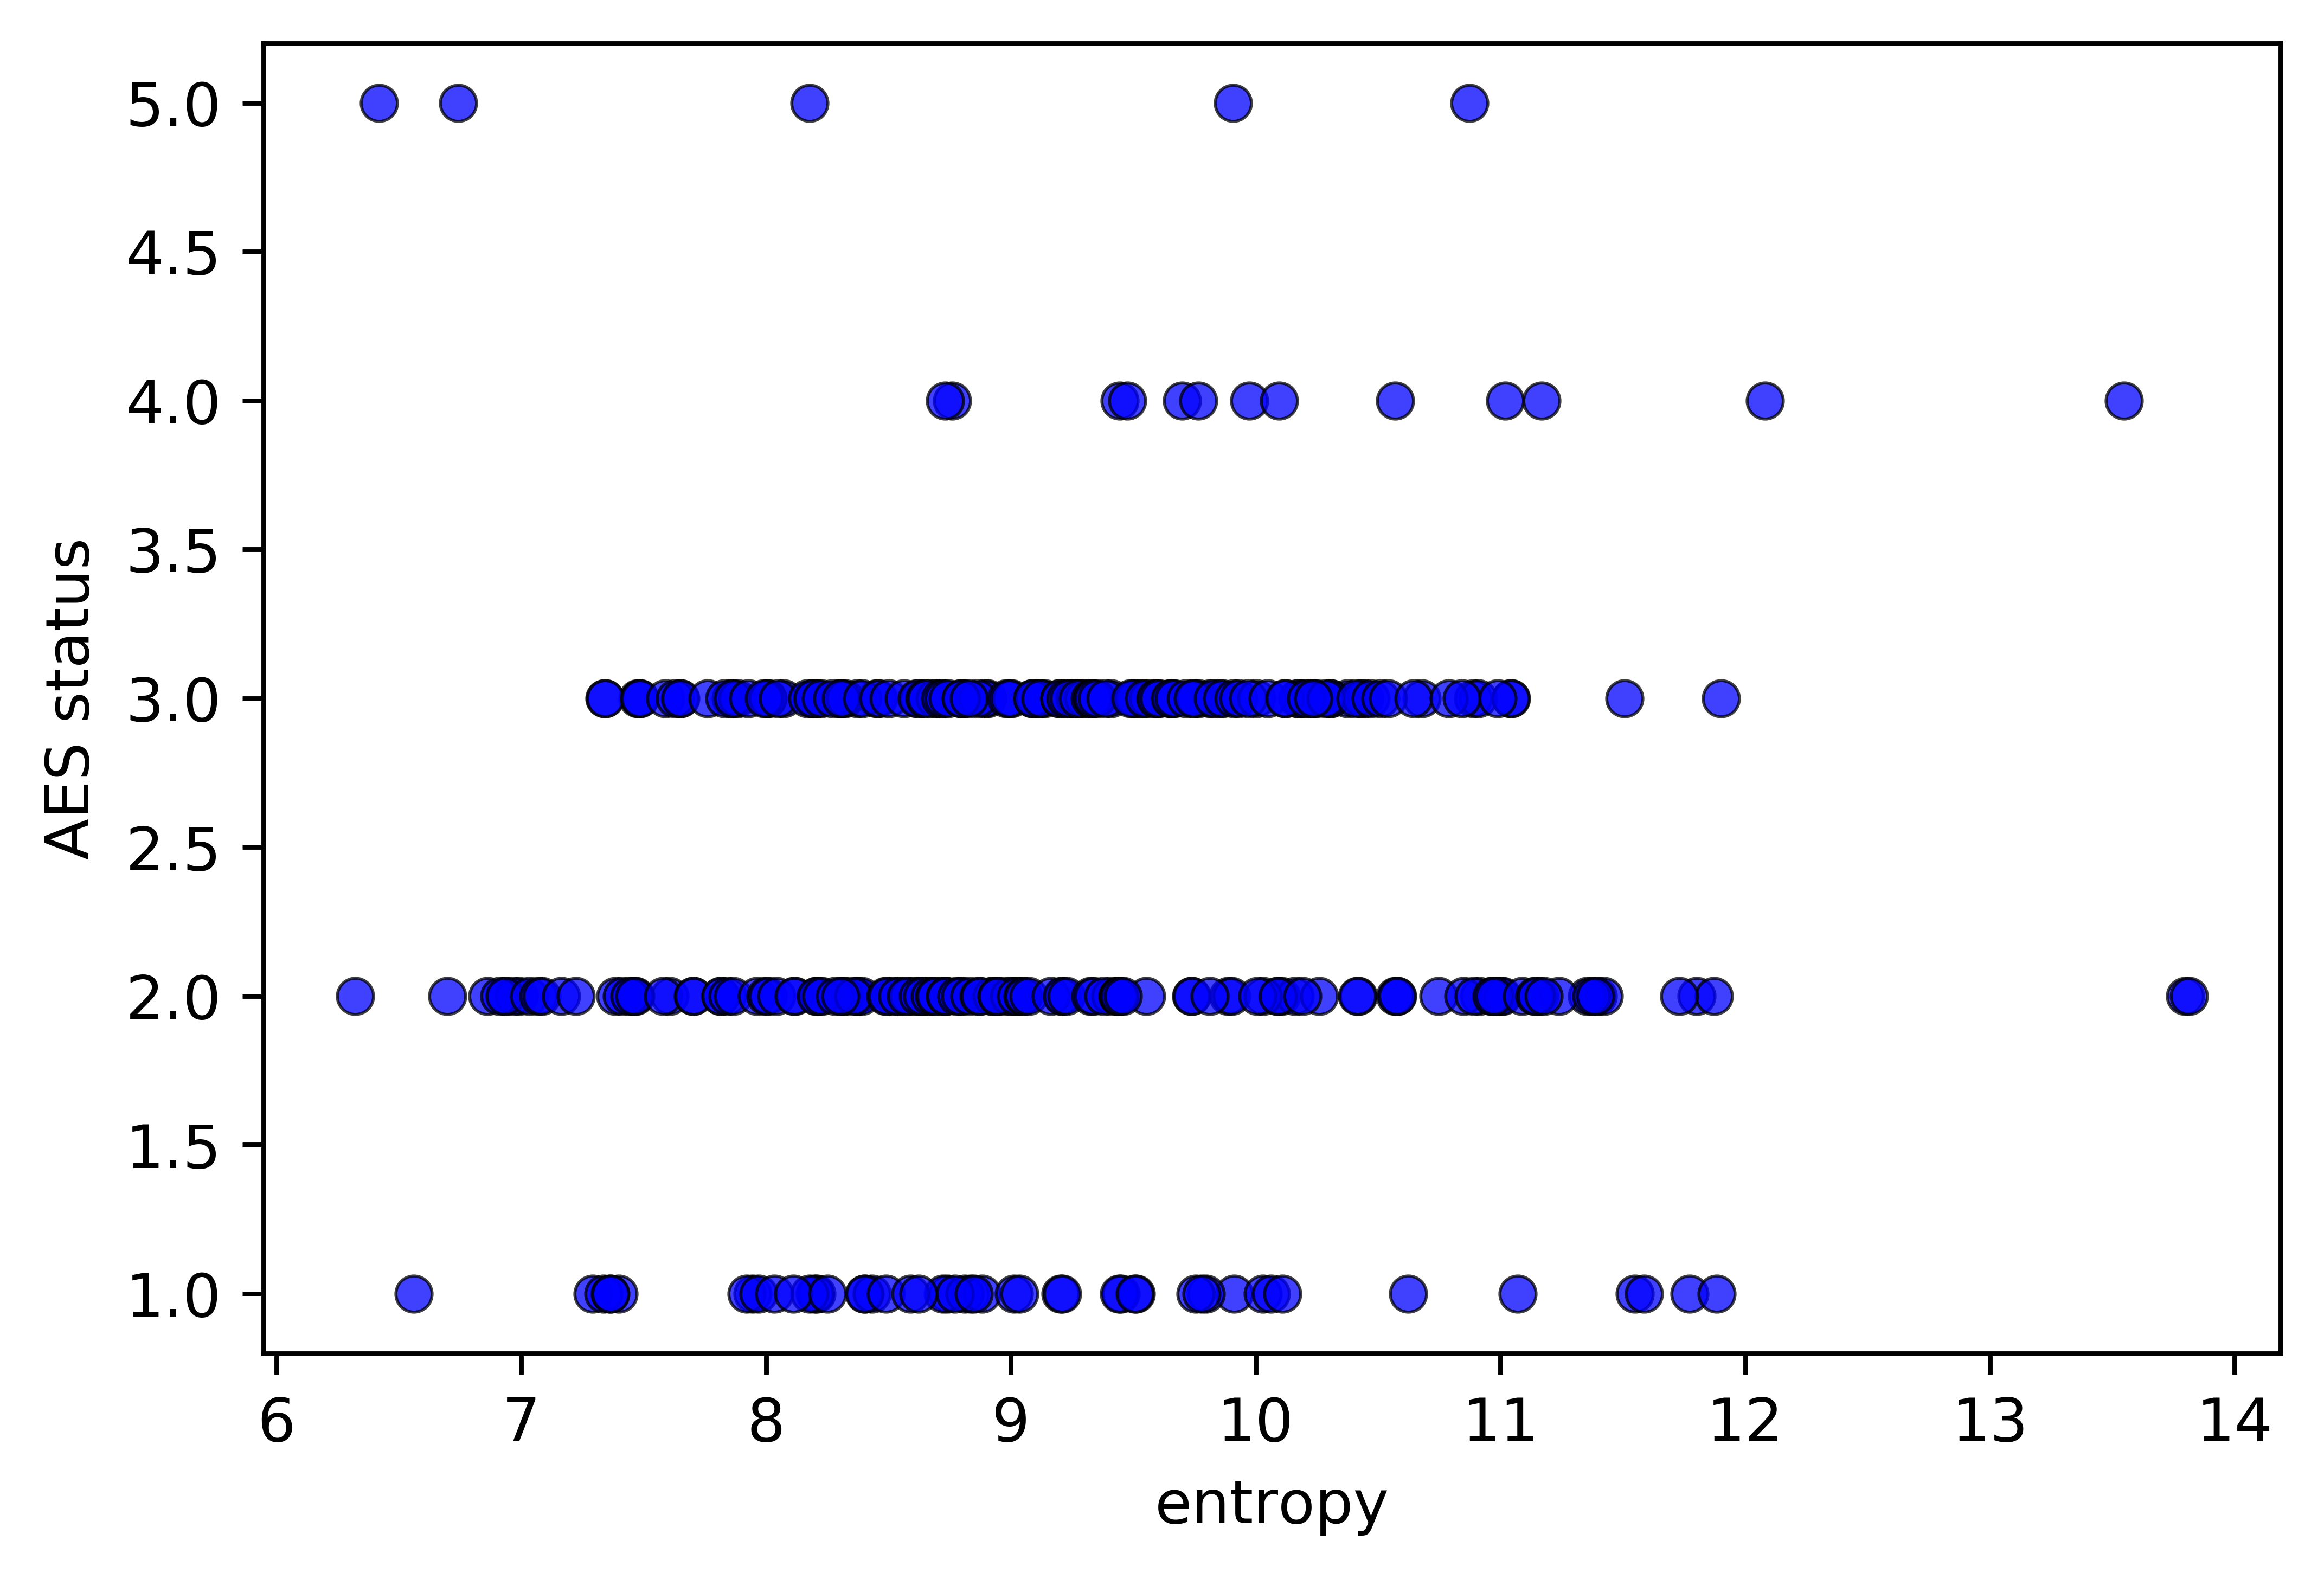

In [28]:
## Grafiquemos :)

import matplotlib.pyplot as plt

cmap = plt.get_cmap('RdBu')

fig, ax = plt.subplots(dpi=800)


ax.plot(H,S,'o',color='blue',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True)

plt.grid(False)
#plt.legend(loc='best',fontsize=7)
plt.ylabel(r'AES status',fontsize=10)
plt.xlabel(r'entropy',fontsize=10)
plt.rcParams.update({'font.size': 10})
plt.savefig('entropy_status.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()